#### 머신러닝 분류_tree

In [1]:
# 와인 데이터 실습

from sklearn.datasets import load_wine
import pandas as pd
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['class'] = wine.target
print(wine.target_names)
df.head()

['class_0' 'class_1' 'class_2']


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [2]:
# 학습 데이터 준비
from sklearn.model_selection import train_test_split
X_data = df.iloc[:, :-1]
y_data = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                test_size=0.2, random_state= 156)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(142, 13) (36, 13)
(142,) (36,)


In [3]:
# 학습/예측/평가
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train , y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.9444


In [4]:
# GridSearchCV 하이퍼 파라미터 찾기
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':['gini', 'entropy'],'max_depth':[None, 2, 3, 5, 7], 
                'min_samples_split':[2,3,5,7],'min_samples_leaf':[1,3,5,7]}
grid_dt = GridSearchCV(dt_clf, param_grid=parameters, cv=5)
grid_dt.fit(X_train, y_train)
scores_df = pd.DataFrame(grid_dt.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.851478,101
1,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.851478,101
2,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.858621,68
3,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.865517,65
4,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.858621,68
...,...,...,...
155,"{'criterion': 'entropy', 'max_depth': 7, 'min_...",0.858621,68
156,"{'criterion': 'entropy', 'max_depth': 7, 'min_...",0.865764,33
157,"{'criterion': 'entropy', 'max_depth': 7, 'min_...",0.865764,33
158,"{'criterion': 'entropy', 'max_depth': 7, 'min_...",0.865764,33


In [5]:
print('GridSearchCV 최적 파라미터:', grid_dt.best_params_)
print(f'GridSearchCV 최고 정확도: {grid_dt.best_score_:.4f}')

GridSearchCV 최적 파라미터: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
GridSearchCV 최고 정확도: 0.8936


In [6]:
model = grid_dt.best_estimator_
pred = model.predict(X_test)
accuracy_score(y_test, pred)

1.0

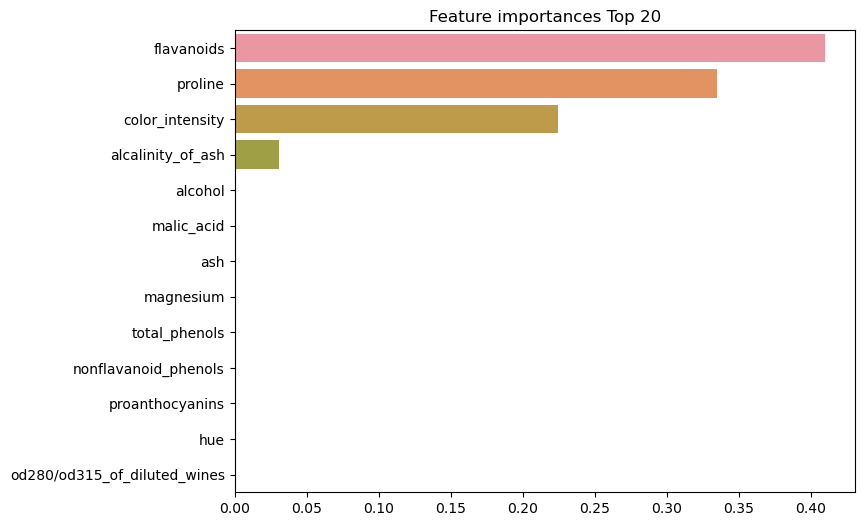

In [7]:
# 피처 중요도 그래프 .feature_importances_
import seaborn as sns
import matplotlib.pyplot as plt
ftr_importances_values = model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

In [8]:
#트리 구조 그래프
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7), dpi=1200)
plot_tree(model, filled=True, feature_names=wine.feature_names, 
        class_names=list(wine.target_names))

[Text(0.4230769230769231, 0.875, 'flavanoids <= 1.575\nentropy = 1.563\nsamples = 142\nvalue = [48, 57, 37]\nclass = class_1'),
 Text(0.15384615384615385, 0.625, 'color_intensity <= 3.825\nentropy = 0.803\nsamples = 49\nvalue = [0, 12, 37]\nclass = class_2'),
 Text(0.07692307692307693, 0.375, 'entropy = 0.0\nsamples = 11\nvalue = [0, 11, 0]\nclass = class_1'),
 Text(0.23076923076923078, 0.375, 'alcalinity_of_ash <= 17.15\nentropy = 0.176\nsamples = 38\nvalue = [0, 1, 37]\nclass = class_2'),
 Text(0.15384615384615385, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = class_1'),
 Text(0.3076923076923077, 0.125, 'entropy = 0.0\nsamples = 37\nvalue = [0, 0, 37]\nclass = class_2'),
 Text(0.6923076923076923, 0.625, 'proline <= 724.5\nentropy = 0.999\nsamples = 93\nvalue = [48, 45, 0]\nclass = class_0'),
 Text(0.5384615384615384, 0.375, 'proline <= 679.0\nentropy = 0.159\nsamples = 43\nvalue = [1, 42, 0]\nclass = class_1'),
 Text(0.46153846153846156, 0.125, 'entropy = 0.0\nsample

#### 머신러닝 분류- 앙상블 학습 ensemble

In [9]:
# VotingClassifier 보팅분류기
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
cancer = load_breast_cancer()
data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [10]:
lr_clf = LogisticRegression(solver='liblinear')
dt_clf = DecisionTreeClassifier(random_state=0)
vo_clf = VotingClassifier( estimators=[('LR',lr_clf), ('DT',dt_clf)] , voting='soft' )
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2 , random_state= 0 )
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print(f'Voting 분류기 정확도: {accuracy_score(y_test,pred):.4f}')

Voting 분류기 정확도: 0.9123


In [11]:
# 각 모델의 정확도 계산
classifiers = [lr_clf, dt_clf]
for clf in classifiers:
    clf.fit(X_train , y_train)
    pred = clf.predict(X_test)
    class_name= clf.__class__.__name__
    print(f'{class_name} 정확도: {accuracy_score(y_test, pred):.4f}')

LogisticRegression 정확도: 0.9561
DecisionTreeClassifier 정확도: 0.9123


In [12]:
# 랜덤포레스트 RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                    test_size=0.2 , random_state= 0)
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print(f'랜덤 포레스트 정확도: {accuracy:.4f}')

랜덤 포레스트 정확도: 0.9649


In [13]:
# 랜덤포레스트 파이퍼 파라미터 튜닝 GridSearchCV
from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[100], 'max_depth' : [6, 8, 10, 12], 
            'min_samples_leaf' : [8, 12, 18 ],'min_samples_split' : [8, 16, 20]}
rf_clf = RandomForestClassifier(random_state=0)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=3, n_jobs=-1, verbose=True)
grid_cv.fit(X_train , y_train)

print('GridSearchCV 최적 파라미터:', grid_cv.best_params_)
print(f'GridSearchCV 최고 정확도: {grid_cv.best_score_:.4f}')

Fitting 3 folds for each of 36 candidates, totalling 108 fits
GridSearchCV 최적 파라미터: {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
GridSearchCV 최고 정확도: 0.9385


In [14]:
model = grid_cv.best_estimator_
pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.9649122807017544

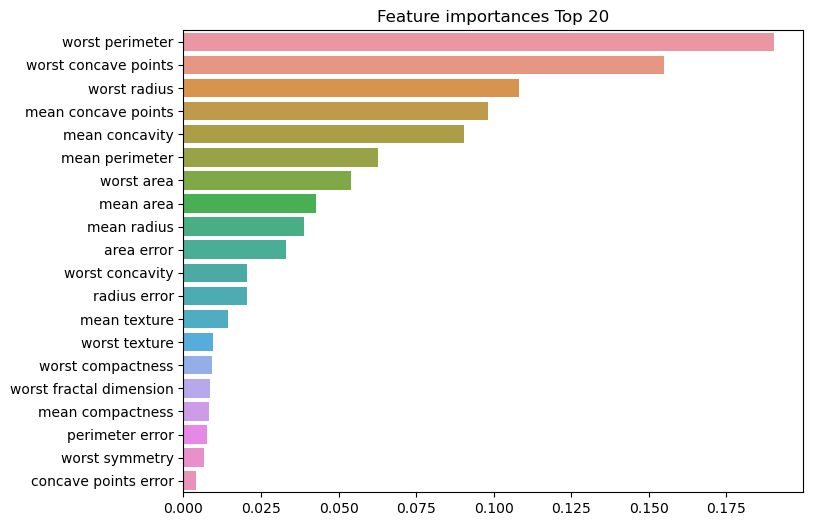

<Figure size 640x480 with 0 Axes>

In [15]:
# 피쳐 중요도 그래프
import matplotlib.pyplot as plt
import seaborn as sns
ftr_importances_values = model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=cancer.feature_names )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()
plt.draw()

In [16]:
# GBM GradientBoostingClassifier

from sklearn.ensemble import GradientBoostingClassifier
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                    test_size=0.2 , random_state= 0)
gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print(f'GBM 정확도: {gb_accuracy:.4f}')

GBM 정확도: 0.9649


####  XGBoost

In [18]:
#  xgboost XGBoodt
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [19]:
dataset = load_breast_cancer()
cancer_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
cancer_df['target'] = dataset.target
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label, 
                test_size=0.2, random_state=156 )
X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train,
                test_size=0.1, random_state=156 )

In [ ]:
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test , label=y_test)
params = {'max_depth':3,'eta': 0.05,'objective':'binary:logistic','eval_metric':'logloss'}
num_rounds = 400

eval_list = [(dtr,'train'),(dval,'eval')] 
# 또는 eval_list = [(dval,'eval')]
xgb_model = xgb.train(params = params , dtrain=dtr, num_boost_round=num_rounds , 
            early_stopping_rounds=50, evals=eval_list )

In [21]:
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:',preds[:10])

predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.845 0.008 0.68  0.081 0.975 0.999 0.998 0.998 0.996 0.001]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

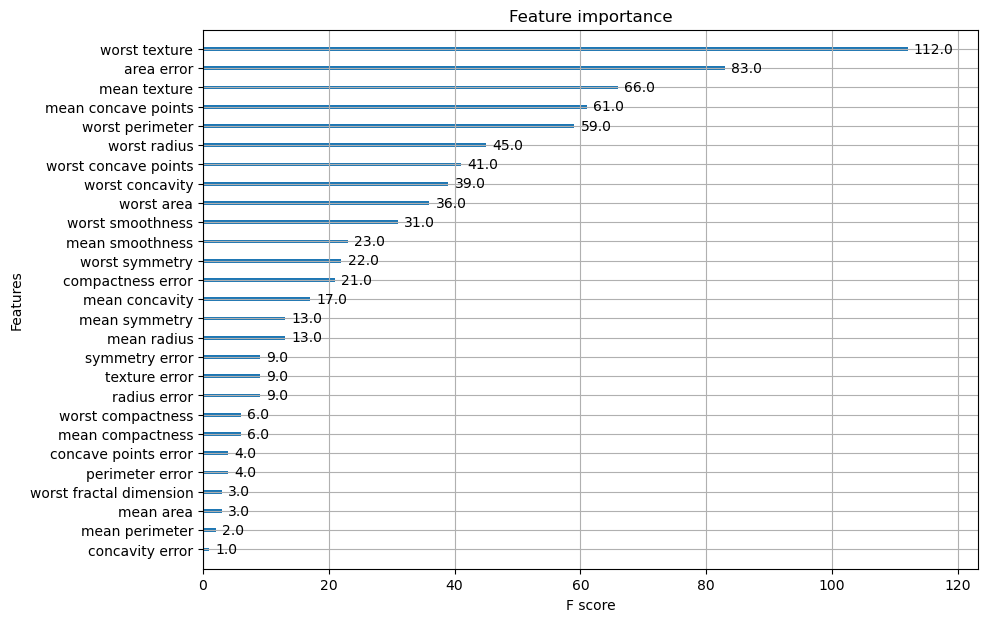

In [22]:
# 그래프 그리기
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 7))
plot_importance(xgb_model, ax=ax)

In [ ]:
#래퍼 XGBClassifier 개요 및 적용
from xgboost import XGBClassifier 
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds = 100, 
eval_metric = "logloss", eval_set=evals)
preds = xgb_wrapper.predict(X_test)
pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [25]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print(f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}')
    print(f'F1: {f1:.4f}, AUC:{roc_auc:.4f}')

In [26]:
get_clf_eval(y_test, ws100_preds, ws100_pred_proba)

NameError: name 'ws100_preds' is not defined

In [27]:
#스태킹 앙상블

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [28]:
# 기본 스태킹 모델
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
cancer_data = load_breast_cancer()
X_data = cancer_data.data
y_label = cancer_data.target
X_train , X_test , y_train , y_test = train_test_split(X_data, y_label, 
test_size=0.2 , random_state=0)

In [29]:
# 개별 ML 모델을 위한 Classifier 생성.
knn_clf =KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier(random_state=0)
ada_clf = AdaBoostClassifier(n_estimators=100)
# 최종 Stacking 모델을 위한 Classifier생성. 
lr_final = LogisticRegression(solver='liblinear')

In [30]:
# 개별 모델들을 학습. 
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train , y_train)
dt_clf.fit(X_train , y_train)
ada_clf.fit(X_train, y_train)
# 학습된 개별 모델들이 각자 반환하는 학습 데이터 셋을 생성
knn_train = knn_clf.predict(X_train)
rf_train = rf_clf.predict(X_train)
dt_train = dt_clf.predict(X_train)
ada_train = ada_clf.predict(X_train)

In [31]:
# 학습된 개별 모델들이 각자 반환하는 테스트 데이터 셋을 생성
knn_test = knn_clf.predict(X_test)
rf_test = rf_clf.predict(X_test)
dt_test = dt_clf.predict(X_test)
ada_test = ada_clf.predict(X_test)
# 학습 데이터와 테스트 데이터로 합치기
pred_train = np.vstack([knn_train, rf_train, dt_train, ada_train]).T
pred_test = np.vstack([knn_test, rf_test, dt_test, ada_test]).T

In [ ]:
lr_final.fit(pred_train, y_train)
final = lr_final.predict(pred_test)
print(f'최종 모델의 정확도: {accuracy_score(y_test , final):.4f}')

In [32]:
# 스태킹 실습
from sklearn.ensemble import StackingClassifier
stack = StackingClassifier([('knn', knn_clf),('rf', rf_clf),('dt', dt_clf),
                ('ada', ada_clf)], final_estimator = lr_clf)
stack.fit(X_train, y_train)
pred = stack.predict(X_test)
accuracy_score(y_test, pred)

0.9649122807017544